In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [15]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'
data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [16]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500


In [17]:
data.reset_index(inplace=True)

In [18]:
#Moving average for 100 days
ma_100_days = data.Close.rolling(100).mean()

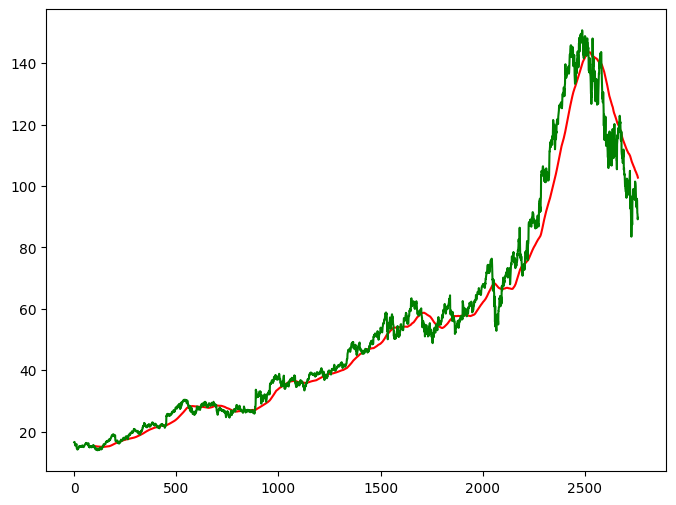

In [19]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

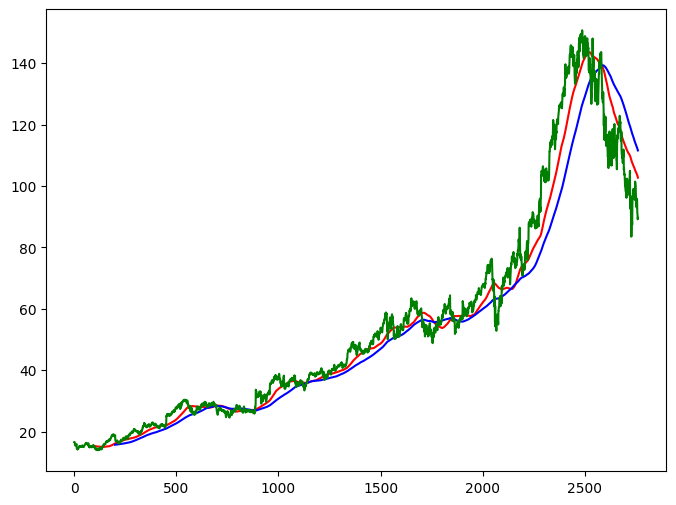

In [20]:
ma_200_days = data.Close.rolling(200).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [21]:
data.dropna(inplace=True)

In [22]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [23]:
data_train.shape[0], data_test.shape[0]

(2208, 553)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [25]:
data_train_scale = scaler.fit_transform(data_train)

In [28]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

In [32]:
x, y = np.array(x), np.array(y)

In [30]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [34]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation='relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [35]:
model.compile(optimizer = 'adam', loss='mean_squared_error')

In [36]:
model.fit(x,y, epochs= 50, batch_size=32, verbose=1)

Epoch 1/50
66/66 [==============================] - 27s 295ms/step - loss: 0.0252
Epoch 2/50
66/66 [==============================] - 21s 317ms/step - loss: 0.0063
Epoch 3/50
66/66 [==============================] - 19s 293ms/step - loss: 0.0058
Epoch 4/50
66/66 [==============================] - 21s 312ms/step - loss: 0.0050
Epoch 5/50
66/66 [==============================] - 21s 316ms/step - loss: 0.0045
Epoch 6/50
66/66 [==============================] - 21s 313ms/step - loss: 0.0045
Epoch 7/50
66/66 [==============================] - 20s 299ms/step - loss: 0.0043
Epoch 8/50
66/66 [==============================] - 20s 301ms/step - loss: 0.0037
Epoch 9/50
66/66 [==============================] - 21s 313ms/step - loss: 0.0041
Epoch 10/50
66/66 [==============================] - 19s 296ms/step - loss: 0.0037
Epoch 11/50
66/66 [==============================] - 21s 314ms/step - loss: 0.0040
Epoch 12/50
66/66 [==============================] - 19s 292ms/step - loss: 0.0032
Epoch 13/50
6

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [39]:
past_100_days = data_train.tail(100)
data_test = pd.concat([past_100_days, data_test], ignore_index=True)
data_test_scale = scaler.fit_transform(data_test)

In [41]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])

x, y = np.array(x), np.array(y)

In [42]:
y_predict =  model.predict(x)

21/21 [==============================] - 4s 105ms/step


In [45]:
scale = 1/scaler.scale_

In [46]:
y_predict = y_predict*scale

In [47]:
y = y*scale

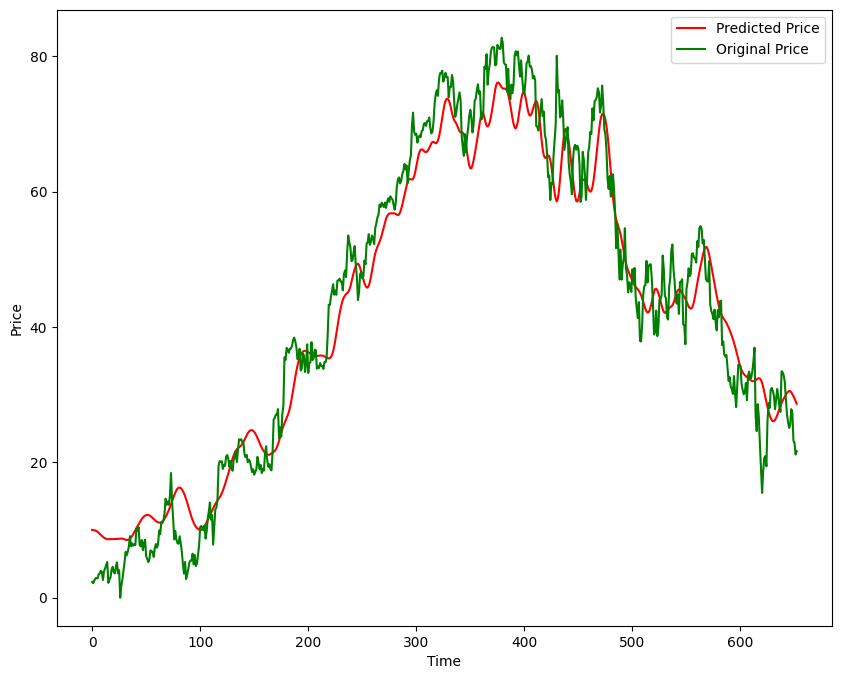

In [48]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [50]:
model.save('Stock Prediction Model.keras')